# Cluster Model ------------------------------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string

In [2]:
# Read the CSV file into a DataFrame
path = '/Users/carlosvelazquez/Desktop/MSBA/Analytical Programming II/Project/final_project_merged.csv'
merged = pd.read_csv(path)

In [3]:
#Preprocess
# Download stopwords from nltk (if not already downloaded)
nltk.download('stopwords')
# Load English stopwords from nltk
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlosvelazquez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Convert text to lowercase
        text = text.lower()
        
        # Remove special characters, numbers, and punctuation using regular expressions
        text = re.sub(r'[^a-z\s.]', '', text)  # Keep only alphabetic characters and spaces
        
        # Remove stopwords
        words = text.split()  # Split the text into words
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        
        # Join the words back into a single string
        return ' '.join(words)
    return ""  # Return an empty string for non-string (NaN) values

# Apply the preprocessing function to the 'Dialogue' column and creating a new column with the preprocessed dialogues
merged['Cleaned_review'] = merged['review'].apply(preprocess_text)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 5, max_features = 200, ngram_range = (1,3), stop_words = "english")



In [7]:
tfidf_matrix = vectorizer.fit_transform(merged['Cleaned_review']) #vectors

In [8]:
feature_names = vectorizer.get_feature_names_out()

In [9]:
dense = tfidf_matrix.todense()
denselist = dense.tolist()

In [10]:
all_keywords = []

for dialogue in denselist:
    x=0
    keywords = []
    for word in dialogue:
        if word>0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)



In [11]:
print("The original text in the Dialogue column of first row:",merged['review'][0])
print("\nThe text in the Dialogue column of first row after preprocessing:", merged['Cleaned_review'][0])
print("\nTF-IDF:",all_keywords[0]) 

The original text in the Dialogue column of first row: BEST GAME I HAVE EVER PLAYED!!!! (except: Minecraft)

The text in the Dialogue column of first row after preprocessing: best game ever played except minecraft

TF-IDF: ['best', 'best game', 'game', 'played']


In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

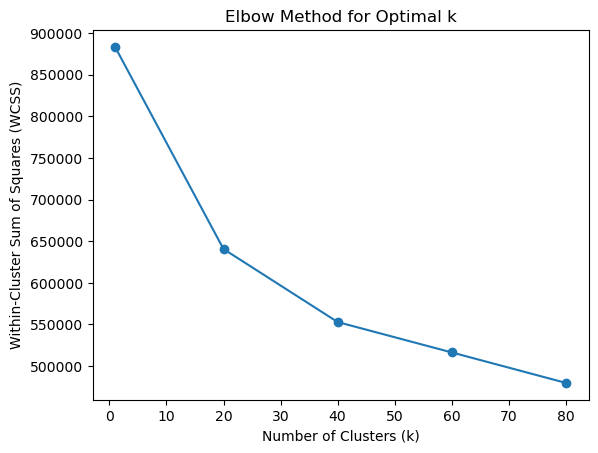

In [14]:
terms = vectorizer.get_feature_names_out()
wcss = []  # To store WCSS for each value of k
k_values = [1, 20, 40, 60, 80]  # Define k values in increments of 10

# Iterate over specified values of k
for value_k in k_values:
   # print(f"\nClustering with {value_k} clusters:")
    
    # Initialize and fit the KMeans model
    model = KMeans(n_clusters=value_k, init="k-means++", max_iter=100, n_init=1)
    model.fit(tfidf_matrix)
    
    # Store WCSS for the Elbow Method plot
    wcss.append(model.inertia_)
    
    # Get cluster centroids and order them
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]


    merged['Cluster'] = model.labels_
    
#elbow
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [16]:
# Assign clusters to your data
merged['Cluster'] = kmeans.labels_


NameError: name 'kmeans' is not defined

In [ ]:
# Get the top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names_out()
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :5]]))  # Top 10 terms
    print("\n")